<a href="https://colab.research.google.com/github/TJhon/DI-src/blob/main/Inmersion_datos_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1

## Modulos

In [1]:
import pandas as pd

### Codigo, datos de la url

In [2]:
data = pd.read_csv("https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/alura_latam-inmersion_datos-arhivos_descarga/inmuebles_bogota.csv")
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [3]:
n_characters = {'Baños':'Banios','Área':'Area'}
data = data.rename(
    columns = n_characters
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### Promedios 

 

In [4]:
area_promedio = data.groupby("Barrio")["Area"].mean().reset_index().sort_values("Area", ascending = False)
top_10_area = area_promedio.head(10)
top_10_area

,Barrio,Area
92,Modelia,4316.750000
83,Libertador,642.000000
11,Bosa Piamonte,400.000000
73,La Soledad,378.625000
114,Restrepo,336.500000
127,Santa Librada,328.000000
80,Las Ferias,320.000000
124,Santa Ana,309.375000
141,Veraguas,302.666667
7,Bellavista Occidental,286.200000


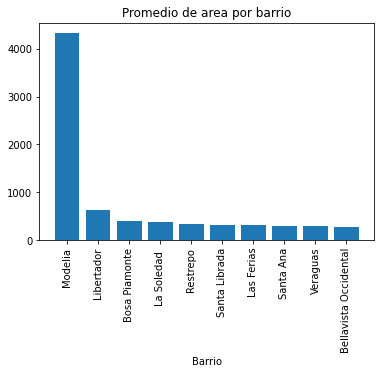

In [5]:
import matplotlib.pyplot as plt
plt.bar(top_10_area['Barrio'], top_10_area['Area'])
plt.xticks(rotation=90)
plt.xlabel("Barrio")
plt.title("Promedio de area por barrio")
plt.show()

## Otros estadisticos

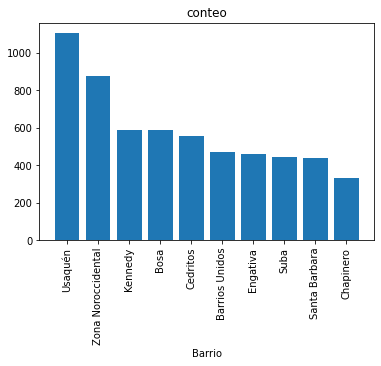

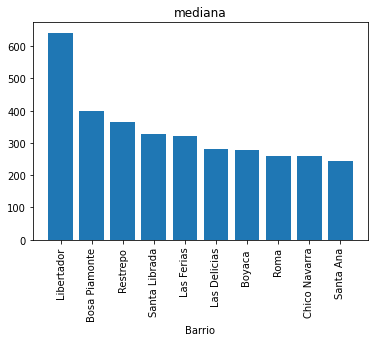

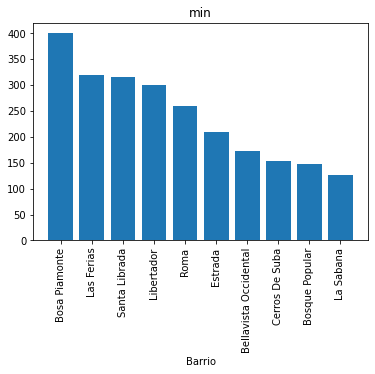

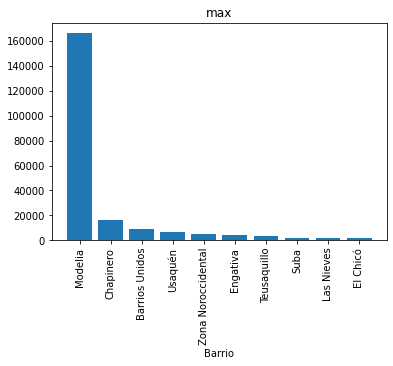

In [6]:
def otros_estadisticos(estadistico, title = ""):
  if estadistico == "conteo":
      area_eval = data.groupby("Barrio")["Area"].size().reset_index().sort_values("Area", ascending=False)
  elif estadistico == "mediana":
      area_eval = data.groupby("Barrio")["Area"].median().reset_index().sort_values("Area", ascending=False)
  elif estadistico == "min":
      area_eval = data.groupby("Barrio")["Area"].min().reset_index().sort_values("Area", ascending=False)
  elif estadistico == "max":
      area_eval = data.groupby("Barrio")["Area"].max().reset_index().sort_values("Area", ascending=False)
  else:
      raise ValueError("Estadístico no válido")


  top_10 = area_eval.head(10)
  top_10

  plt.bar(top_10['Barrio'], top_10['Area'])
  plt.xticks(rotation=90)
  plt.xlabel("Barrio")
  plt.title(estadistico)
  plt.show()

otros_estadisticos("conteo")
otros_estadisticos("mediana")
otros_estadisticos("min")
otros_estadisticos("max")

# Clase 2

**Desafíos**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [7]:
import numpy as np, seaborn as sns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [9]:
precio = data.Valor.replace({'\$': '', '\.': ''}, regex=True).astype("float")
data["precio10_6"] = precio / (10 ** 6)
data["precio_m2"] = data["precio10_6"] / data["Area"]
data.head()

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,precio10_6,precio_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.142857
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.941176
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.578125


In [10]:
data.groupby("Tipo").size()

Tipo
Apartamento            7327
Bodega                   13
Casa                   2043
Edificio                 22
Finca                    11
Local                    38
Lote                      6
Oficina/Consultorio      60
dtype: int64

In [11]:
tipos = np.unique(data.Tipo)
np.random.seed(2)
tipos_3 = np.random.choice(tipos, 3)
tipos_3

array(['Apartamento', 'Oficina/Consultorio', 'Local'], dtype=object)

In [12]:
data_sample = data.query("Tipo in @tipos_3")
data_sample.head()

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,precio10_6,precio_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.142857
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.578125
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,510.0,8.225806


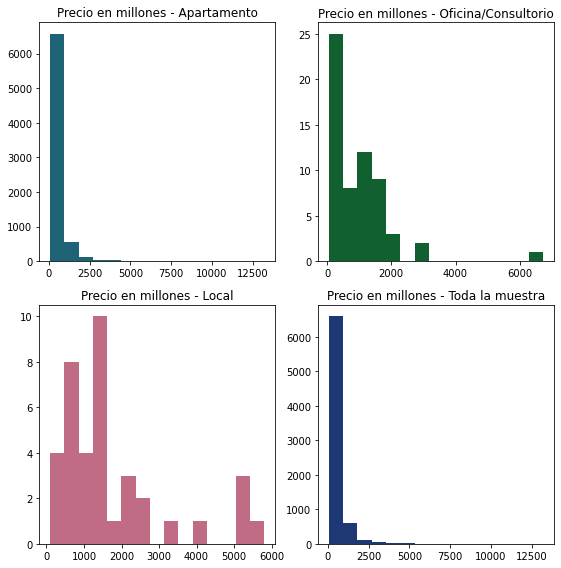

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (8, 8))
bins = 15
x, y = 0, 0
eval = "precio10_6"
colores = ['#1e6375', '#106030', '#C06C84', '#1e3875']
for i, tipo in enumerate(tipos_3):
    data_ref = data_sample.query("Tipo == @tipo")
    precio_m2 = data_ref[eval]
    x, y = divmod(i, 2)
    ax[x, y].hist(precio_m2, bins=bins, color = colores[i])
    ax[x, y].set_title(f"Precio en millones - {tipo}")
    # ax[x, y].
    
plt.tight_layout()

ax[1, 1].hist(data_sample[eval], bins = bins, color = colores[3]) 
ax[1, 1].set_title(f"Precio en millones - Toda la muestra")

plt.show();


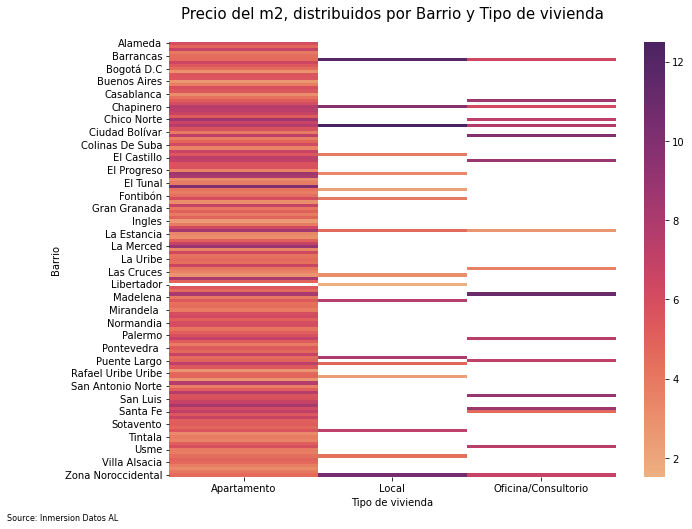

In [14]:
data_grouped = data_sample.groupby(['Barrio', 'Tipo']).mean().sort_values(["precio_m2"], ascending = False).reset_index()
data_grouped = data_grouped.sort_values(["Tipo", "precio_m2"], ascending = [True, False])
plt.figure(figsize = (10, 8))
sns.heatmap(data_grouped.pivot(index='Barrio', columns='Tipo', values='precio_m2'), cmap='flare')

plt.title("Precio del m2, distribuidos por Barrio y Tipo de vivienda\n", fontsize = 15)
plt.xlabel('Tipo de vivienda')
plt.ylabel('Barrio')
plt.text(-0.1, 0.05, 'Source: Inmersion Datos AL', fontsize=8, transform=plt.gcf().transFigure)
plt.show()